In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


In [ ]:
# Function to load data
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Data Loaded Successfully: {df.shape[0]} rows and {df.shape[1]} columns")
        print("Preview of the Data:")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None


In [ ]:
# Function to preprocess data
def preprocess_data(df):
    # Impute missing values for numerical columns
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[num_cols] = SimpleImputer(strategy='mean').fit_transform(df[num_cols])

    # Encode categorical variables
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        df[col] = LabelEncoder().fit_transform(df[col])

    # Scale numerical features
    df[num_cols] = StandardScaler().fit_transform(df[num_cols])

    return df

In [ ]:
# Function for exploratory data analysis (EDA)
def perform_eda(df):
    print("Generating Pair Plot...")
    sns.pairplot(df)
    plt.show()

    print("Generating Heatmap of Correlation...")
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.show()



In [ ]:
# Function to train model based on problem type
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score

# Function to train model based on problem type
def train_model(df, target_column):
    # Check if it's a classification or regression problem
    # If target has unique values less than 20 and are integers, treat as classification
    if pd.api.types.is_integer_dtype(df[target_column]) and df[target_column].nunique() < 20:
        problem_type = 'classification'
    else:
        problem_type = 'regression'

    # Split data into features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if problem_type == 'classification':
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print("Classification Model Performance:")
        print(f"Accuracy: {accuracy_score(y_test, predictions)}")
        print(f"Classification Report:\n {classification_report(y_test, predictions)}")

    elif problem_type == 'regression':
        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print("Regression Model Performance:")
        print(f"Mean Squared Error: {mean_squared_error(y_test, predictions)}")
        print(f"R-Squared: {r2_score(y_test, predictions)}")

    return model, problem_type

In [ ]:

# Function to generate predictions on new data
def make_predictions(model, df, problem_type):
    if problem_type == 'classification':
        predictions = model.predict(df)
    elif problem_type == 'regression':
        predictions = model.predict(df)
    return predictions


Data Loaded Successfully: 303 rows and 14 columns
Preview of the Data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Generating Pair Plot...


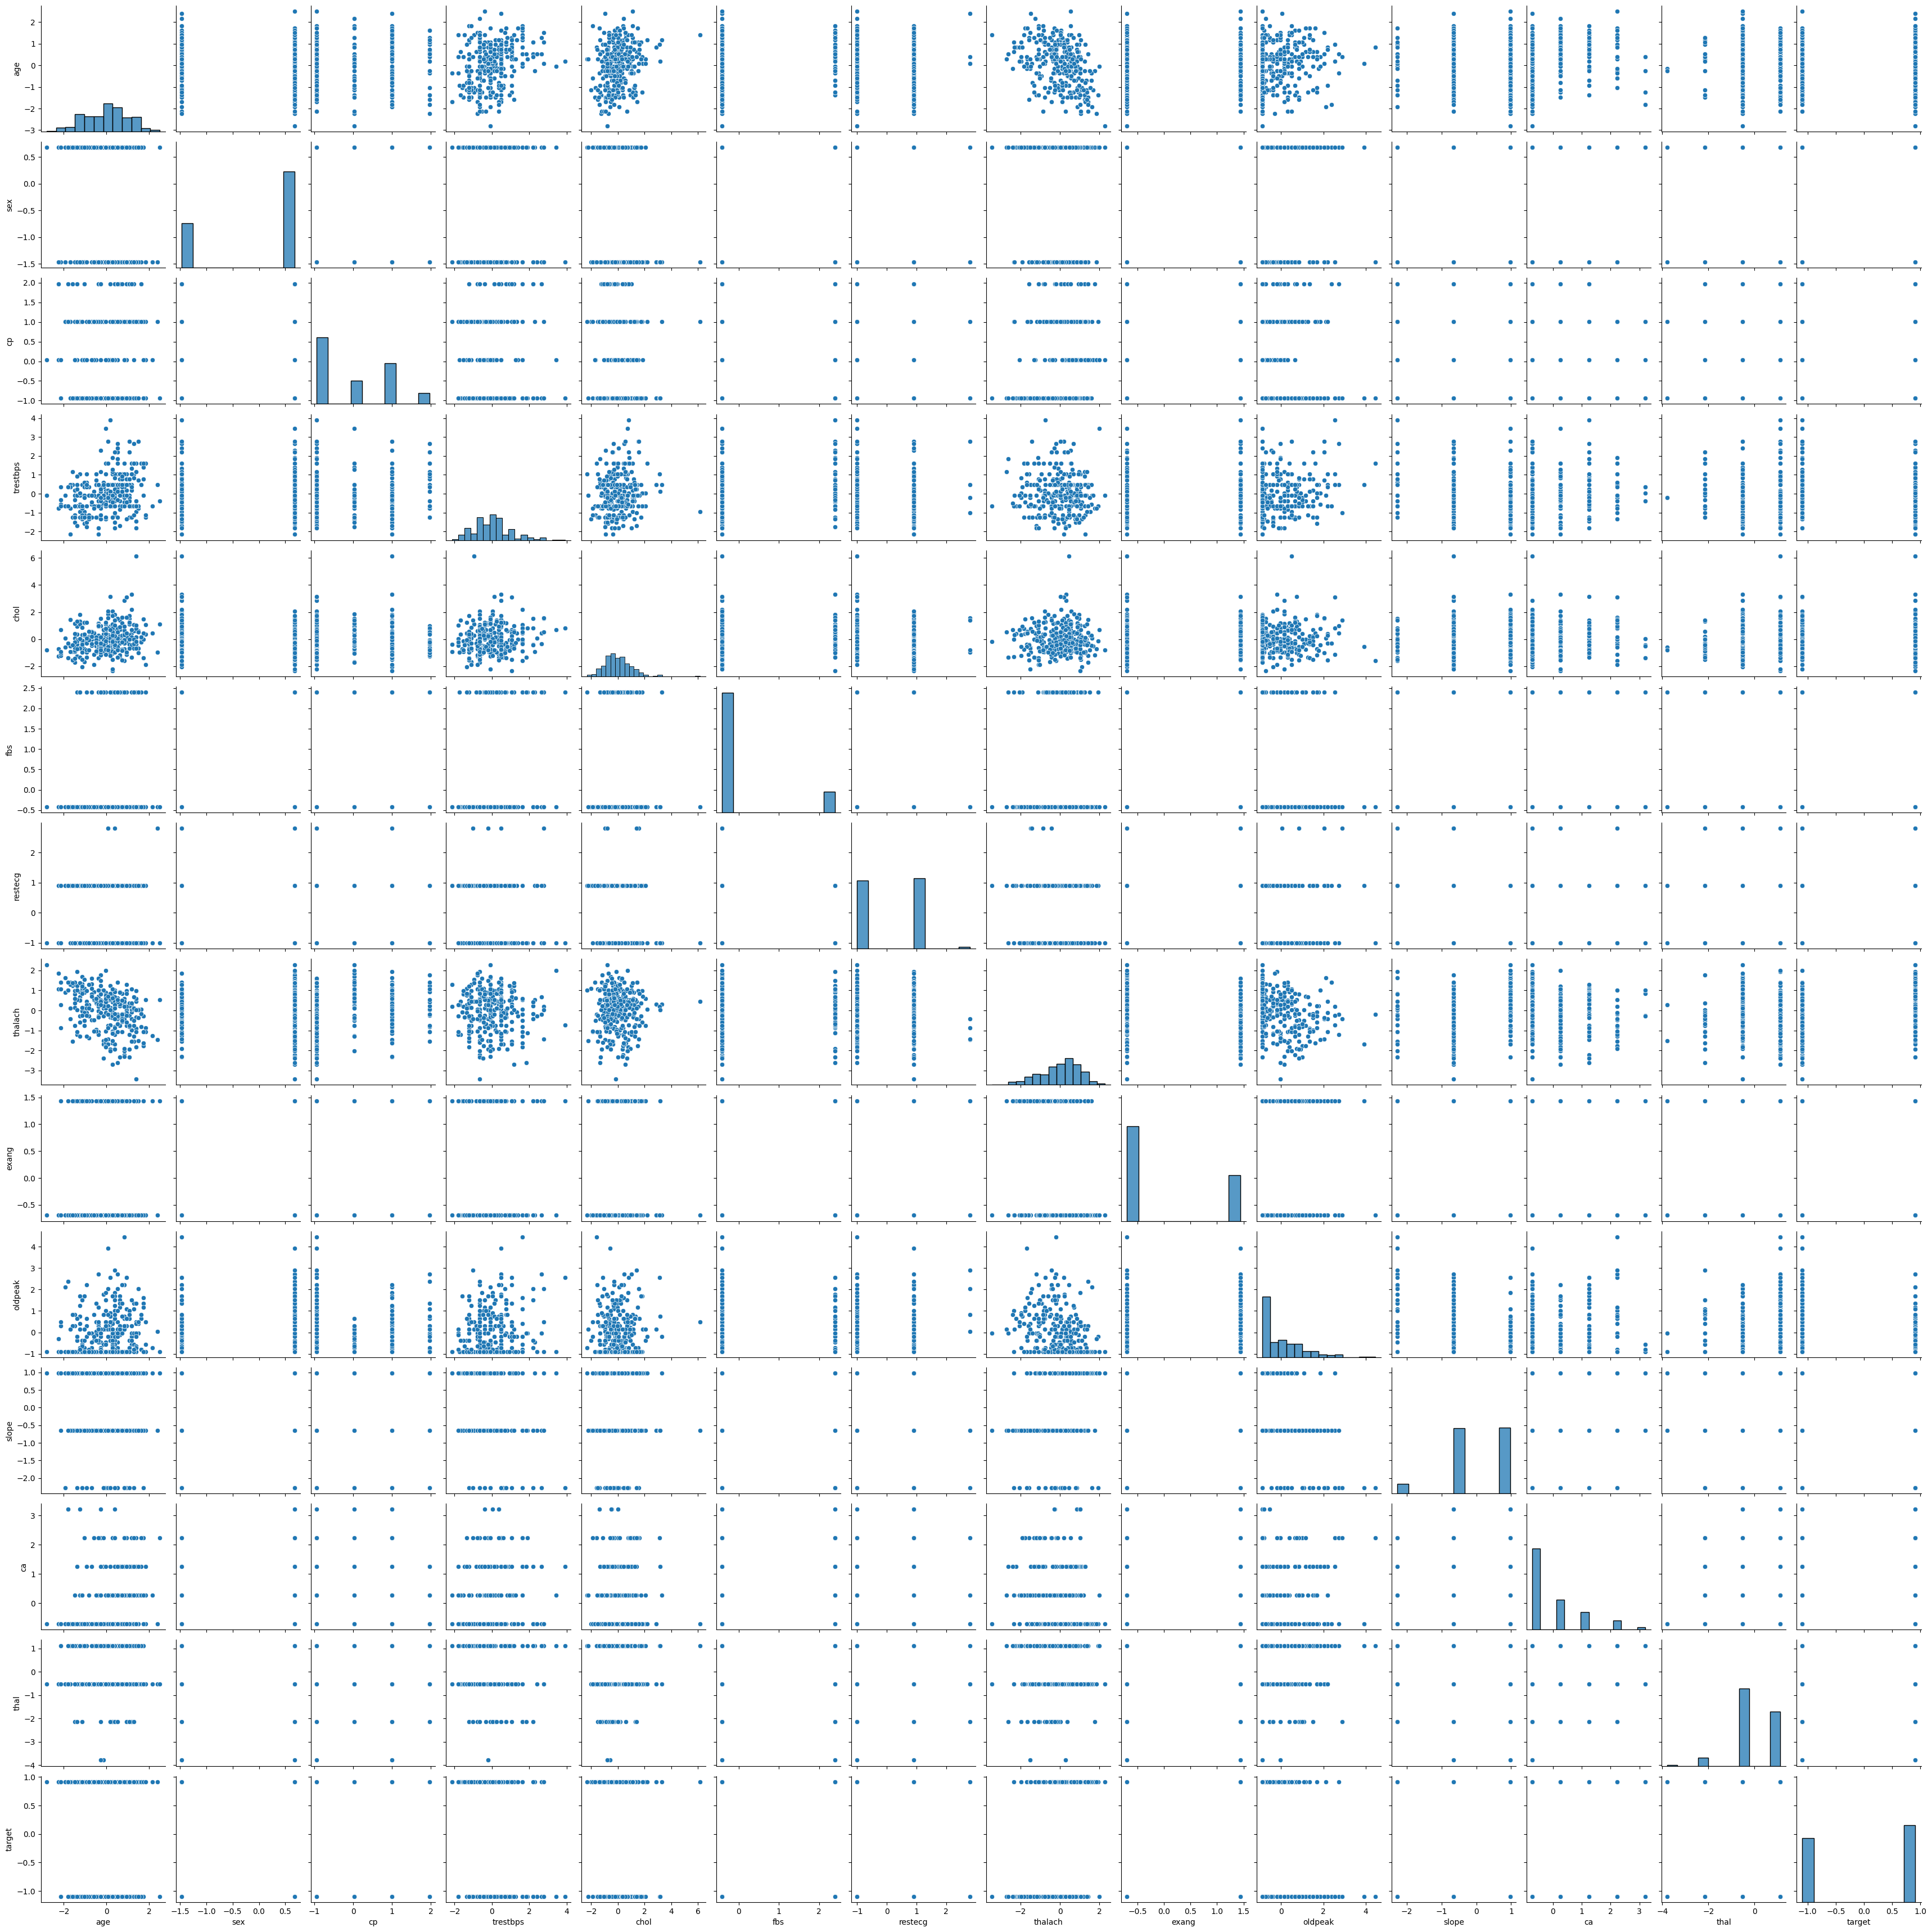

Generating Heatmap of Correlation...


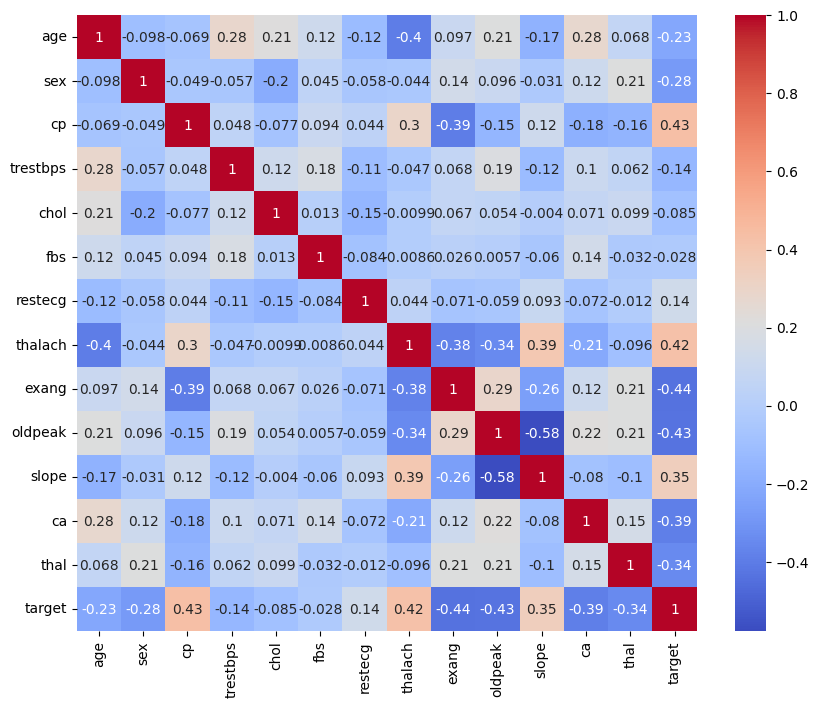

Regression Model Performance:
Mean Squared Error: 0.4759232825762978
R-Squared: 0.5267109913793102
Model training completed.
Sample Predictions:
[0.53301147 0.31213279 0.91452919 0.89444931 0.45269195]


In [ ]:
# Function to run the entire pipeline
def run_pipeline(file_path, target_column):
    df = load_data(file_path)
    if df is not None:
        df = preprocess_data(df)
        perform_eda(df)
        model, problem_type = train_model(df, target_column)
        print("Model training completed.")

        # Sample prediction (using the test set or new data)
        sample_data = df.drop(columns=[target_column]).iloc[:5]
        print("Sample Predictions:")
        predictions = make_predictions(model, sample_data, problem_type)
        print(predictions)
    else:
        print("Pipeline aborted due to data loading error.")

# Run the pipeline with your CSV file and target column name
file_path = '/content/heart.csv'  # Replace with your CSV file path
target_column = 'target'  # Replace with your target column name
run_pipeline(file_path, target_column)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
